# Combine comparers
ModelSkill comparers can be combined by using the "+" operator. You may want to add a new ModelResult to your existing comparison or a new observation or a new time period:

    cc = cc1 + cc2

In [1]:
import modelskill as ms

## Observations

In [2]:
o1 = ms.PointObservation('../tests/testdata/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = ms.PointObservation("../tests/testdata/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")
o3 = ms.TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=3, name="c2")

## Model Results

In [3]:
fn = "../tests/testdata/SW/CMEMS_DutchCoast_*.nc"
mr1 = ms.ModelResult(fn, name='CMEMS', item='VHM0')
mr1

<GridModelResult> 'CMEMS'

In [4]:
mr2 = ms.ModelResult('../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu', name='MIKE21SW', item=0)

## Connect and extract
Notice that the two ModelResults doesn't cover the exact same period.

<AxesSubplot: >

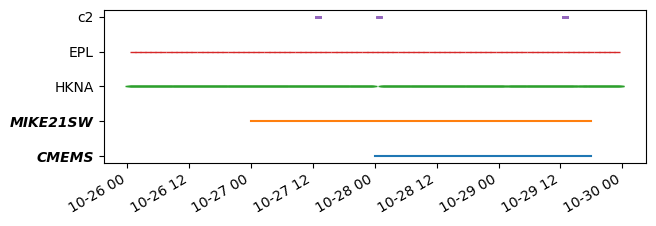

In [5]:
ms.plot_temporal_coverage(obs=[o1,o2,o3], mod=[mr1,mr2], limit_to_model_period=False)

In [6]:
cc1 = ms.compare(obs=[o1,o2,o3], mod=mr1)#, name='SW')
cc2 = ms.compare(obs=[o1,o2,o3], mod=mr2)# , name='SW')

In [7]:
cc1.skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
EPL,43,-0.440930,0.518713,0.273210,0.443256,0.920165,0.089591,0.445177
HKNA,242,-0.741920,0.881698,0.476388,0.741920,0.902987,0.127873,0.221544
c2,39,-0.302117,0.472280,0.363006,0.397694,0.935287,0.091603,0.745605


In [8]:
cc2.skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
EPL,67,-0.066597,0.223597,0.213449,0.188513,0.969846,0.082522,0.932596
HKNA,386,-0.194260,0.351964,0.293499,0.251839,0.971194,0.094489,0.905300
c2,113,-0.001210,0.351797,0.351794,0.294585,0.974335,0.127776,0.899507


## Add the two Comparers

In [9]:
cc = cc1 + cc2

In [10]:
cc.skill()

n      bias      rmse     urmse       mae        cc  \
model    observation                                                          
CMEMS    EPL           43 -0.440930  0.518713  0.273210  0.443256  0.920165   
         HKNA         242 -0.741920  0.881698  0.476388  0.741920  0.902987   
         c2            39 -0.302117  0.472280  0.363006  0.397694  0.935287   
MIKE21SW EPL           43 -0.078281  0.204842  0.189294  0.173804  0.973262   
         HKNA         242 -0.229809  0.411363  0.341185  0.295643  0.948802   
         c2            39  0.321283  0.406855  0.249616  0.353367  0.963817   

                            si        r2  
model    observation                      
CMEMS    EPL          0.089591  0.445177  
         HKNA         0.127873  0.221544  
         c2           0.091603  0.745605  
MIKE21SW EPL          0.062073  0.913476  
         HKNA         0.091582  0.830548  
         c2           0.062990  0.811206